<a href="https://colab.research.google.com/github/Jhernandezh2/MetodosI_JulianaHernandez_MariaCamilaRamirez/blob/main/TAREA%203%3A%20Integraci%C3%B3n/Tarea_3_completa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TAREA 3. INTEGRACION**

**Capítulo 4. Derivación e integrción numérica**

**Ejercicios: integración**

**Punto 3.** *(Theoretical)* Hacer los pasos intermedios para encontrar la regla de Simpson simple.
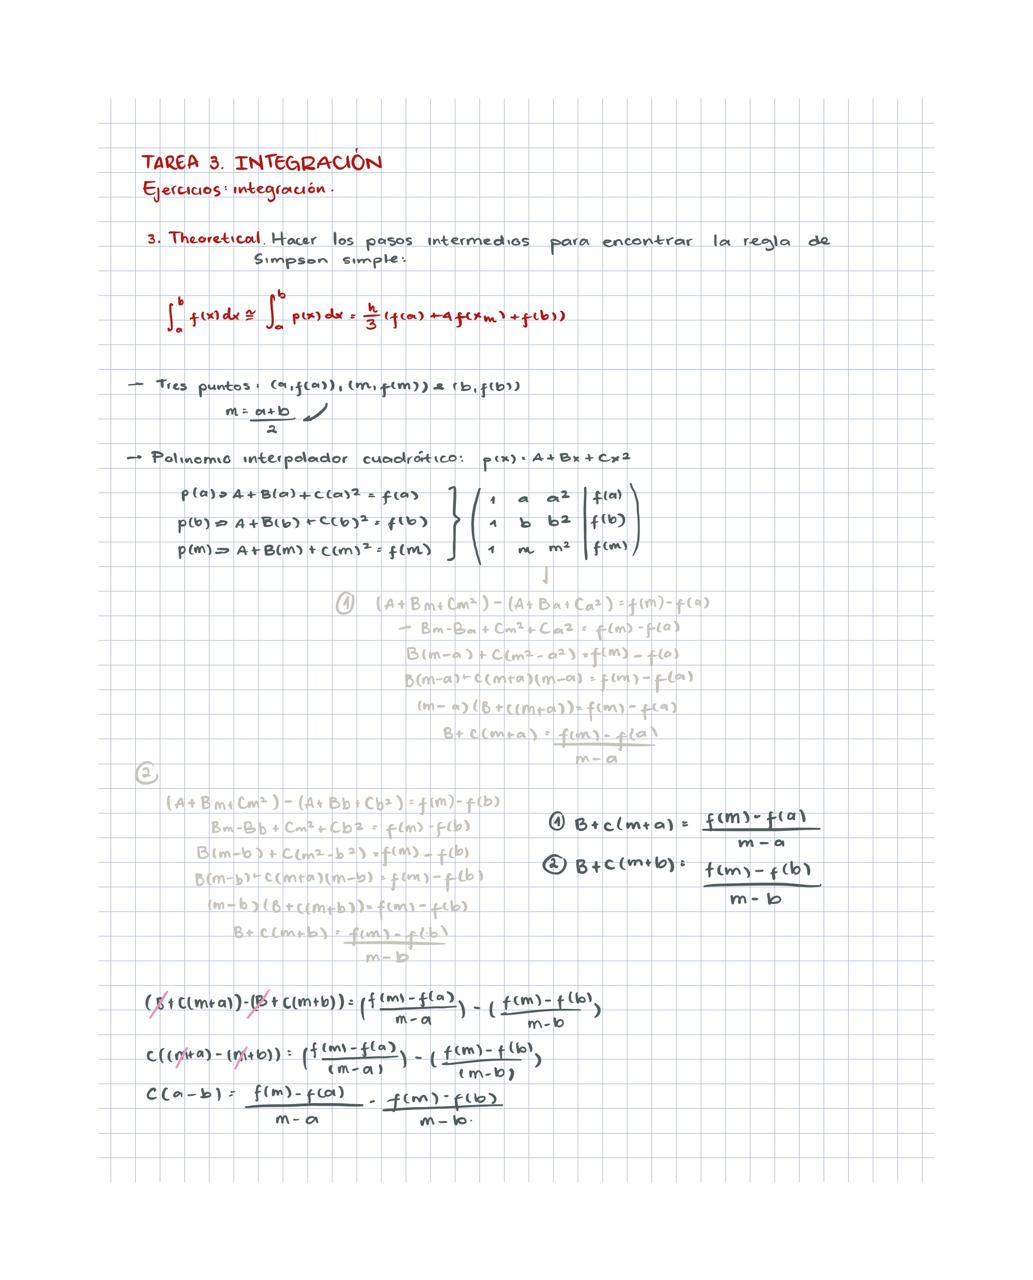
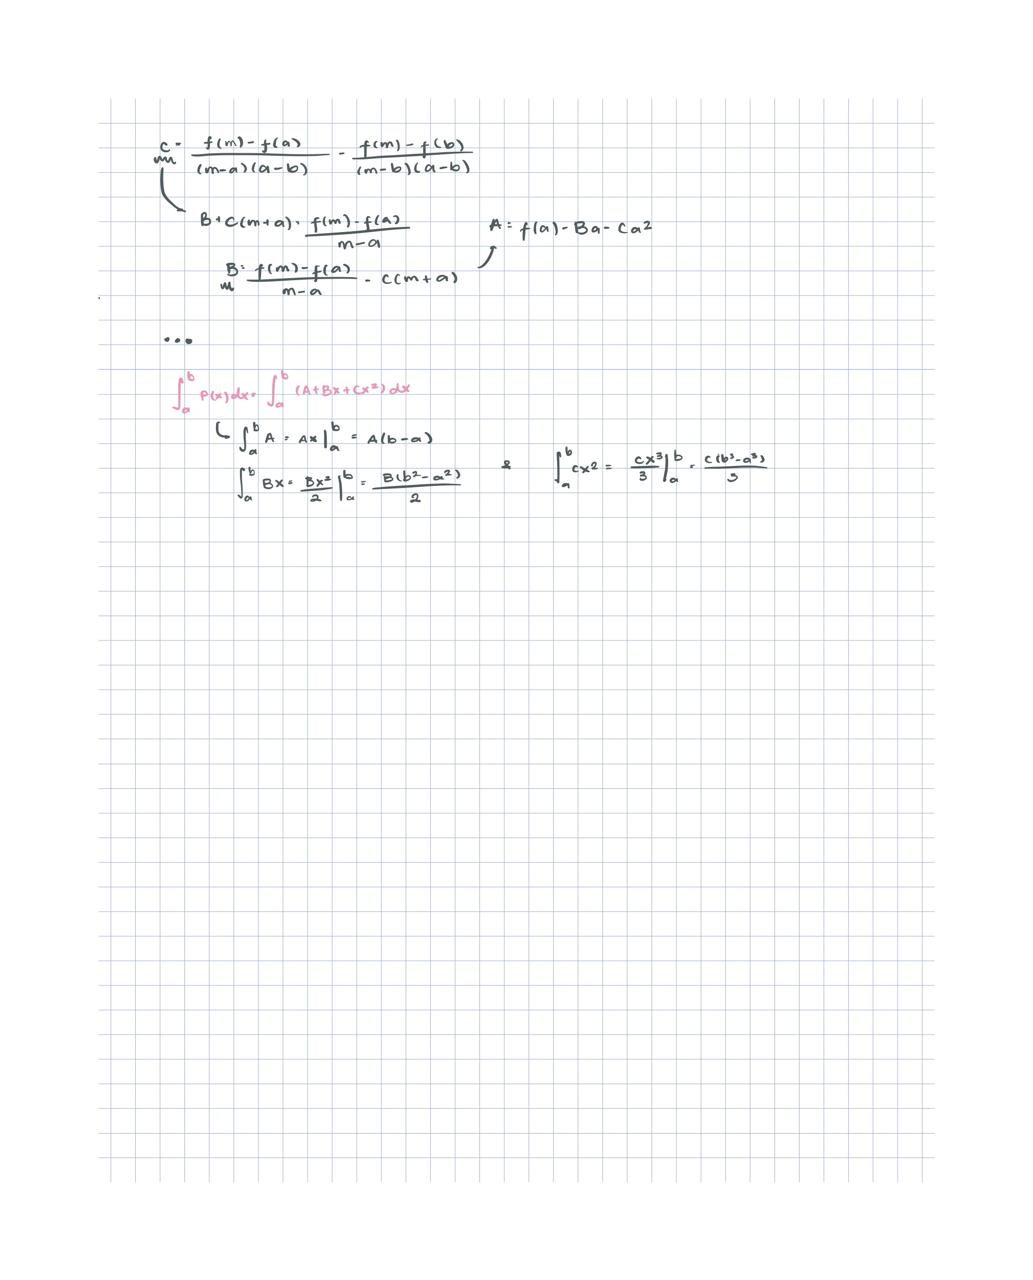

**Punto 5**

 Resolver la siguiente integral con el método del trapecio:

 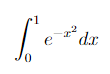

In [1]:
import numpy as np
def funcion(x):
   return np.exp(-x**2)

In [2]:
def trapecio(f,a,b,n):
  x = np.linspace(a,b,n+1)
  y = f(x)
  h = (b-a)/n
  integral = (h/2)*(np.sum(y[:-1]+y[1:]))
  return integral

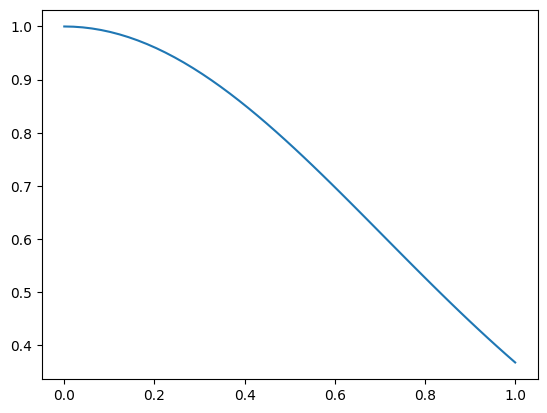

In [3]:
import matplotlib.pyplot as plt
x = np.linspace(0,1,50)
y = funcion(x)
plt.plot(x,y)

In [4]:
import sympy as sp
import numpy as np
x = sp.Symbol('x')
f = sp.exp(-x**2)
df2= sp.diff(f,x,2)
subs = df2.subs(x,0.5)
print(subs)
b= 1
a=0
#NÚMERO DE PARTICIONES
error = 0.005
n = np.sqrt((((b-a)**3)*float(-subs))/(12*error))
print("El número de puntos para un error menor a 0,005 es de: ", round(n))

-0.778800783071405
El número de puntos para un error menor a 0,005 es de:  4


In [5]:
#Integral
integral_euler = trapecio(funcion,0,1,4)
print("La integral estimada es ")
print(integral_euler)

La integral estimada es 
0.7429840978003812


In [6]:
#Error
error = np.abs(integral_euler - 0.746824)
print(error)

0.0038399021996188276


**Punto 6.**  Estimar la integral con el metodo del trapecio y la regla
de Simpson 1/3, con un error menor al 0.5%.
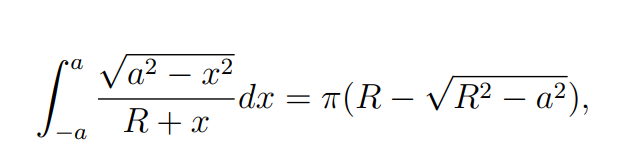

6

In [7]:
import numpy as np
import matplotlib.pyplot as plt

R = 0.5
a = 0.01


def f(x):
  return (np.sqrt(a**2-x**2))/(R+x)


def regla_de_simpson(f, a, b, N):
    if N % 2 == 1:
        raise ValueError("N tiene ue ser par")

    h = (b - a) / N
    x = np.linspace(a, b, N+1)
    fx = f(x)

    integral = fx[0] + fx[-1] + 4 * np.sum(fx[1:-1:2]) + 2 * np.sum(fx[2:-2:2])
    return (h / 3) * integral


def metodo_del_trapecio(f, a, b, N):
  h = (b - a) / N
  x = np.linspace(a, b, N+1)
  fx = f(x)

  integral = fx[0] + fx[-1] + 2 * np.sum(fx[1:-1])
  return (h / 2) * integral


a_limit = -a
b_limit = a


N = 10

simpson_result = regla_de_simpson(f, a_limit, b_limit, N)
trapezoidal_result = metodo_del_trapecio(f, a_limit, b_limit, N)

print(f"Regla de Simpson: {simpson_result}")
print(f"Método del trapecio: {trapezoidal_result}")

# Check para tolerancia de error
#tolerance = 0.005

#N = 10
#error = float('inf')

#while error > tolerance:
    #simpson_result = regla_de_simpson(f, a_limit, b_limit, N)
    #trapezoidal_result = metodo_del_trapecio(f, a_limit, b_limit, N)

    #error = abs(simpson_result - trapezoidal_result)
    #print(f"N = {N}, Simpson: {simpson_result}, Trapezoidal: {trapezoidal_result}, Error: {error}")

    #N += 2

Regla de Simpson: 0.00031004702233502313
Método del trapecio: 0.00030373233837885323


**Punto 7.** Una forma de generalizar el metodo de integracion del trapecio para una integral doble de una funcion f(x, y) consiste en dividir el plano xy en un grilla de cuadrados iguales y calcular el promedio del valor de la funcion de cada uno de los 4 vertices de cada cuadrado pequeño de la grilla.

*Procedimiento:*
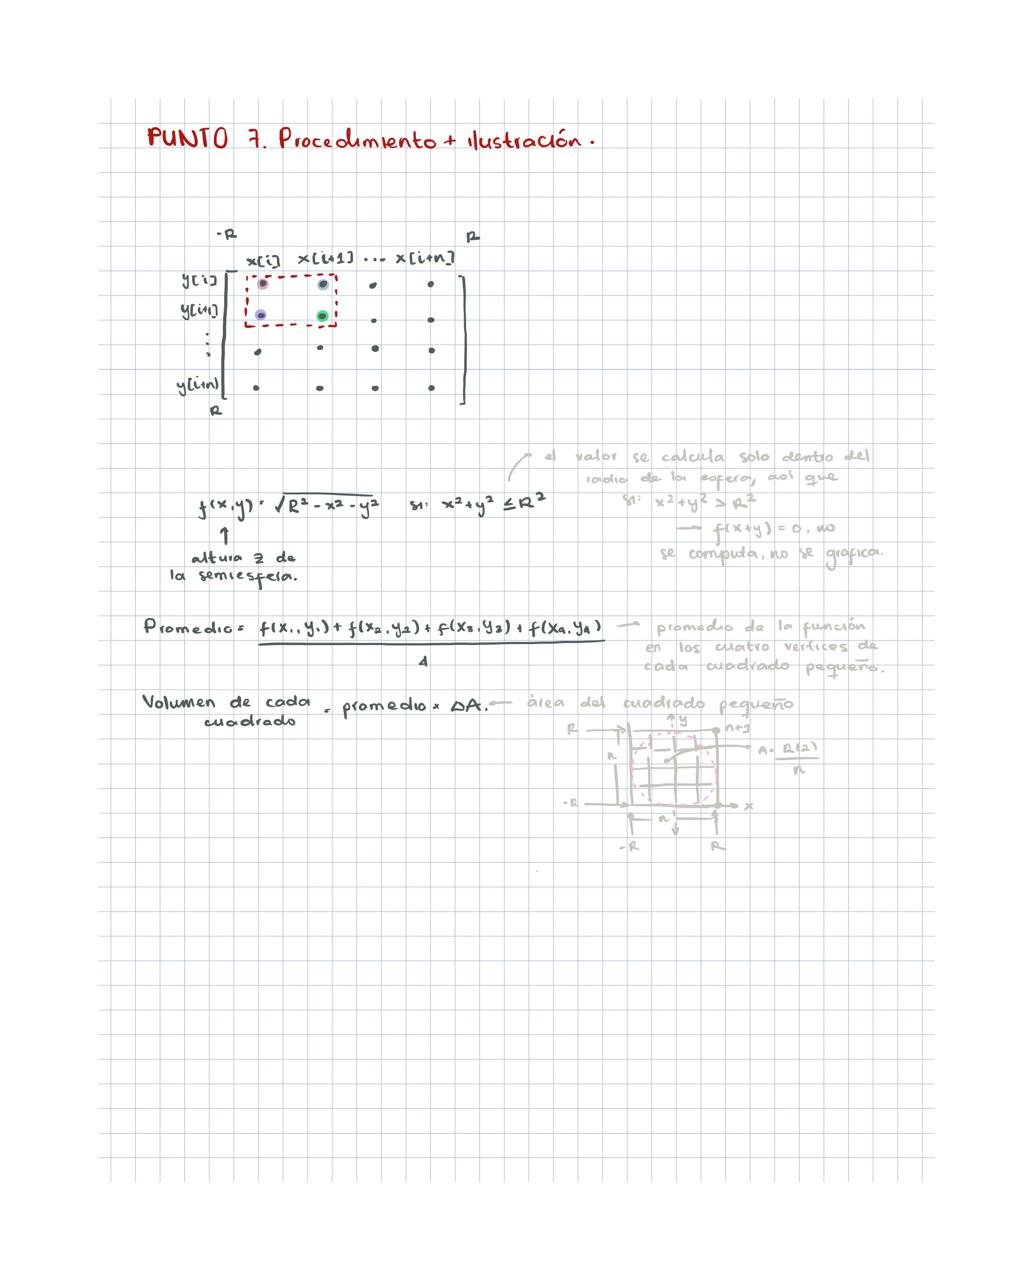


In [8]:
import numpy as np


R = 1
n = 100
tol = 1e-10

#Grilla entr -R y R
val_x = np.linspace(-R, R, n+1)
val_y = np.linspace(-R, R, n+1)

volumen_total = 0

def f(x, y):

    r2 = x**2 + y**2
    if r2 <= R**2 + tol:  # Tuve que añadir tolerancia para que la precision de numpy no de valores negativos dentro de la raiz
        return np.sqrt(max(R**2 - r2, 0))
    else:
        return 0

lado_cuadrado = 2 * R / n

for i in range(n):
    for j in range(n):
        # Coordenadas de los 4 vértices de cada cuadrado
        x1, y1 = val_x[i], val_y[j]
        x2, y2 = val_x[i+1], val_y[j]
        x3, y3 = val_x[i], val_y[j+1]
        x4, y4 = val_x[i+1], val_y[j+1]


        promedio = (f(x1, y1) + f(x2, y2) + f(x3, y3) + f(x4, y4)) / 4


        volumen_total += promedio * lado_cuadrado**2

volumen = volumen_total



**PUNTO 9**

La regla de Simpson 3/8 consiste en aproximar el integrando por un polinomiointerpolador de orden 3.

In [9]:
import sympy as sp

x, h, a = sp.symbols('x h a')
f = sp.Function('f')

x0 = a
x1 = a+h
x2 = a+2*h
x3 = a+3*h

L0 = ((x - x1)*(x - x2)*(x - x3)) / ((x0 - x1)*(x0 - x2)*(x0 - x3))
L1 = ((x - x0)*(x - x2)*(x - x3)) / ((x1 - x0)*(x1 - x2)*(x1 - x3))
L2 = ((x - x0)*(x - x1)*(x - x3)) / ((x2 - x0)*(x2 - x1)*(x2 - x3))
L3 = ((x - x0)*(x - x1)*(x - x2)) / ((x3 - x0)*(x3 - x1)*(x3 - x2))

P = f(a)*L0 + f(x1)*L1 + f(x2)*L2 + f(x3)*L3
integral = sp.integrate(P, (x, a, a + 3*h))
integral = sp.simplify(integral)
integral

3*h*(f(a) + 3*f(a + h) + 3*f(a + 2*h) + f(a + 3*h))/8

b)Dado  que h= (b−a)/3,  muestre  que  los  puntos  intermedios  son 2a+b/3 y a+2b/3 respectivamente.

In [10]:
#remplazando h en los puntos
x, b, a = sp.symbols('x b a')
h = (b-a)/3

x0=a
x1 = a+h
x2 = a+2*h
x3 = a+3*h
x = [x0, x1, x2, x3]
x

[a, 2*a/3 + b/3, a/3 + 2*b/3, b]

In [11]:
print("Los puntos medios son: ", x[1], "y", x[2])

Los puntos medios son:  2*a/3 + b/3 y a/3 + 2*b/3


**PUNTO 10**



In [12]:
import sympy as sp

x, h = sp.symbols('x h')
f = sp.Function('f')
n = 3
derivadaenesima = sp.diff(f(x),x, n+1)
e = derivadaenesima.subs(x, sp.Symbol('ξ'))/sp.factorial(n+1)

integral = sp.expand(x * (x - h) * (x - 2*h) * (x - 3*h))
I = sp.integrate(integral, (x, 0, 3*h))
I = sp.simplify(I)* e
I

-3*h**5*Derivative(f(ξ), (ξ, 4))/80

Punto 15. (Sympy) Dada la aproximacion de cuadratura gausiana:

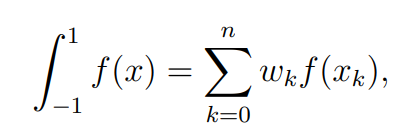

(a) Halle los ceros de los primeros 20 polinomios de Legendre.

(b) Halle los pesos de ponderacion para los primeros 20 polinomios de Legendre.


In [13]:
import sympy as sp
import numpy as np

def poly_legendre(n,x):
  Pn = sp.legendre(n,x)
  return Pn.subs(sp.symbols('x'),x)

def derivada_poly_legendre (n,x):
  Pn = sp.legendre(n,x)
  return Pn.diff(sp.symbols('x')).subs(sp.symbols('x'),x)

def newton_rhapson (n,x0,tol = 1e-7, max_iters = 100):
  x = x0

  for j in range (max_iters):
    f_x = poly_legendre (n,x)
    f_prima_x = derivada_poly_legendre(n,x)

    if f_prima_x == 0:
      break
    x_nueva = x-f_x/f_prima_x
    if abs (x_nueva-x)<tol:
      return x_nueva
    x = x_nueva
  return x

def calcular_raices_legendre(n,num):
  raices = []
  valor_inicial = np.linspace (-1,1,num+2)[1:-1]

  for x0 in valor_inicial:
    raiz = newton_rhapson(n,x0)
    if raiz not in raices:
      raices.append(raiz)
  return sorted(raices)

def calcular_pesos (raices,n):
  pesos = []

  for raiz in raices:
    derivada = derivada_poly_legendre(n,raiz)

    if derivada != 0:
      peso = 2/((1-raiz**2)*(derivada**2))
      pesos.append(peso)

    else:
      pesos.append(0)
  return pesos

num = 20
todas_las_raices = []
todos_los_pesos = []

for n in range(num):
  raices = calcular_raices_legendre(n,n)
  pesos = calcular_pesos(raices,n)
  todas_las_raices.append(raices)
  todos_los_pesos.append(pesos)

for n in range (num):
  print (f"P_{n}(x) raices: {todas_las_raices[n]}")
  print (f"Pesos para P_{n}(x):{todos_los_pesos[n]}")
  print ()





P_0(x) raices: []
Pesos para P_0(x):[]

P_1(x) raices: [0.0]
Pesos para P_1(x):[0]

P_2(x) raices: [-0.33333333333333337, 0.33333333333333326]
Pesos para P_2(x):[0, 0]

P_3(x) raices: [-0.5, 0.0, 0.5]
Pesos para P_3(x):[0, 0, 0]

P_4(x) raices: [-0.6, -0.19999999999999996, 0.20000000000000018, 0.6000000000000001]
Pesos para P_4(x):[0, 0, 0, 0]

P_5(x) raices: [-0.6666666666666667, -0.33333333333333337, 0.0, 0.33333333333333326, 0.6666666666666665]
Pesos para P_5(x):[0, 0, 0, 0, 0]

P_6(x) raices: [-0.7142857142857143, -0.4285714285714286, -0.1428571428571429, 0.1428571428571428, 0.4285714285714284, 0.7142857142857142]
Pesos para P_6(x):[0, 0, 0, 0, 0, 0]

P_7(x) raices: [-0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75]
Pesos para P_7(x):[0, 0, 0, 0, 0, 0, 0]

P_8(x) raices: [-0.7777777777777778, -0.5555555555555556, -0.33333333333333337, -0.11111111111111116, 0.11111111111111116, 0.33333333333333326, 0.5555555555555554, 0.7777777777777777]
Pesos para P_8(x):[0, 0, 0, 0, 0, 0, 0, 0]

P_9(x) ra

**PUNTO 16**

Estime la siguiente integral usando método de Gauss-Legendre:

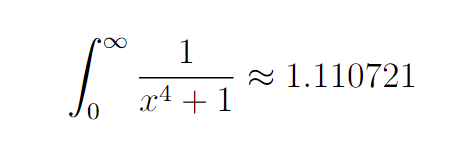

In [14]:
def fcero1(x):
    return 0.5*(1/((((x+1)/2)**4)+1))

In [15]:
def finfinito(x):
    return 0.5*(((x+1)/2)**-2)*(1/(((2/(x+1))**4)+1))

In [16]:
def CuadraturaGaussLegendre(a,b,funcion,n):
  raices, pesos = np.polynomial.legendre.leggauss(n)
  raicest = 0.5 * (raices*(b - a) + a + b)
  integral = 0.5 * (b - a) * np.sum(pesos * funcion(raicest))
  return integral

In [17]:
#Cálculo de la integral
integral = CuadraturaGaussLegendre(-1,1,fcero1,4)+ CuadraturaGaussLegendre(-1,1,finfinito,4)
print("Integral 1 = ", CuadraturaGaussLegendre(-1,1,fcero1,4))
print("Integral 2 = ",CuadraturaGaussLegendre(-1,1,finfinito,4))
print("La integral estimada es de ", integral)

Integral 1 =  0.8669556574543683
Integral 2 =  0.24382693094823105
La integral estimada es de  1.1107825884025995


**PUNTO 17**

 In the black-body radiation problem the following integral appear:

 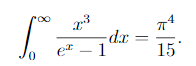

a)  Compute this integral using the Gauss-Laguerre quadrature method for n=3 evaluationpoints.

b)  For this estimation, plot the relative error (εr(n) =Iestimated(n)/Iexact) as a functionof the evaluation points, withn= [2,3,...,10] [4.6].


In [18]:
def funcion(x):
  return (x**3)/(1-np.exp(-x))

In [19]:
import numpy as np
def GaussLaguerre(f, n):
    Roots, Weights = np.polynomial.laguerre.laggauss(n)
    integral = np.sum( Weights*f(Roots) )
    return integral

In [20]:
#Integral n=3
integral = GaussLaguerre(funcion,3)
print(integral)

6.481130171540027


**Gráfica**

In [21]:
#Integral exacta
IExacta = (np.pi**4)/ 15
print(IExacta)

6.493939402266828


In [22]:
#Integral estimada despendiendo de n
ni = np.linspace(2, 10, 9)
IEstimada = np.zeros(len(ni))

for n in range(len(ni)):
    IEstimada[n] = GaussLaguerre(funcion, int(ni[n]))

print(ni, IEstimada)

[ 2.  3.  4.  5.  6.  7.  8.  9. 10.] [6.41372747 6.48113017 6.49453564 6.49431337 6.49394141 6.49391891
 6.49393567 6.4939402  6.49393997]


In [23]:
#Error
Error = IEstimada/IExacta
Error

array([0.98764819, 0.99802751, 1.00009181, 1.00005759, 1.00000031,
       0.99999684, 0.99999942, 1.00000012, 1.00000009])

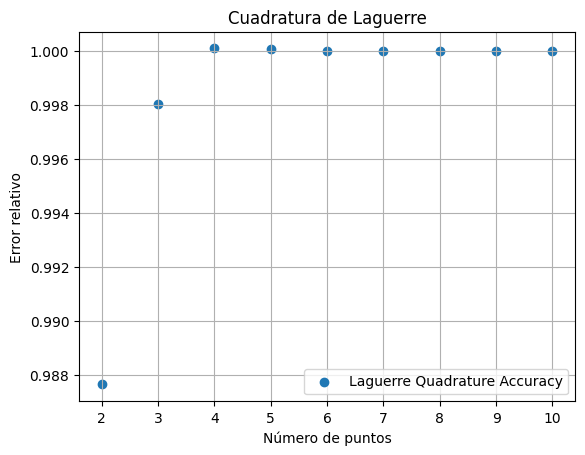

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.grid(True)
ax.scatter(ni, Error, label='Laguerre Quadrature Accuracy')
plt.xlabel('Número de puntos')
plt.ylabel('Error relativo')
plt.title('Cuadratura de Laguerre')
ax.legend()
plt.show()

Punto 21. Una funcion se puede representar como una combinacion lineal de N + 1 polinomios de Legendre Pn(x), n = 0, 1, ..., N.

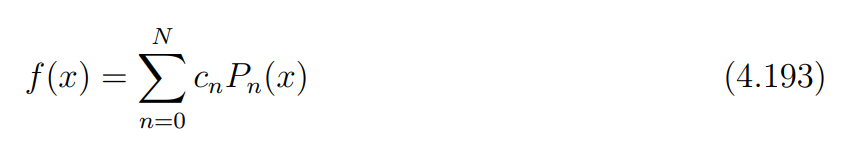

El problema computacional requiere la estimacion de los coeficientes de la expansion. Sea la funcion signo:

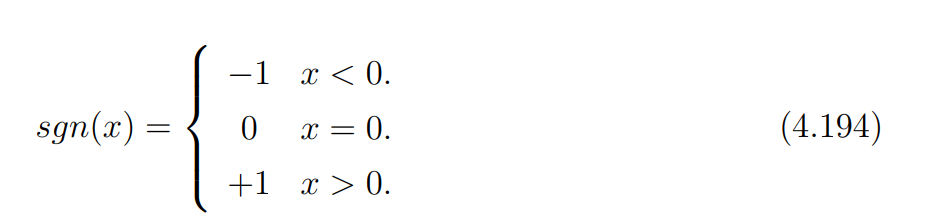

(a) (Theoretical) Usando las relaciones de ortogonalidad de los polinomios de Legendre, muestre que los coeficientes estan dados por:

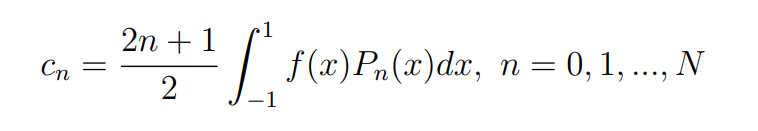



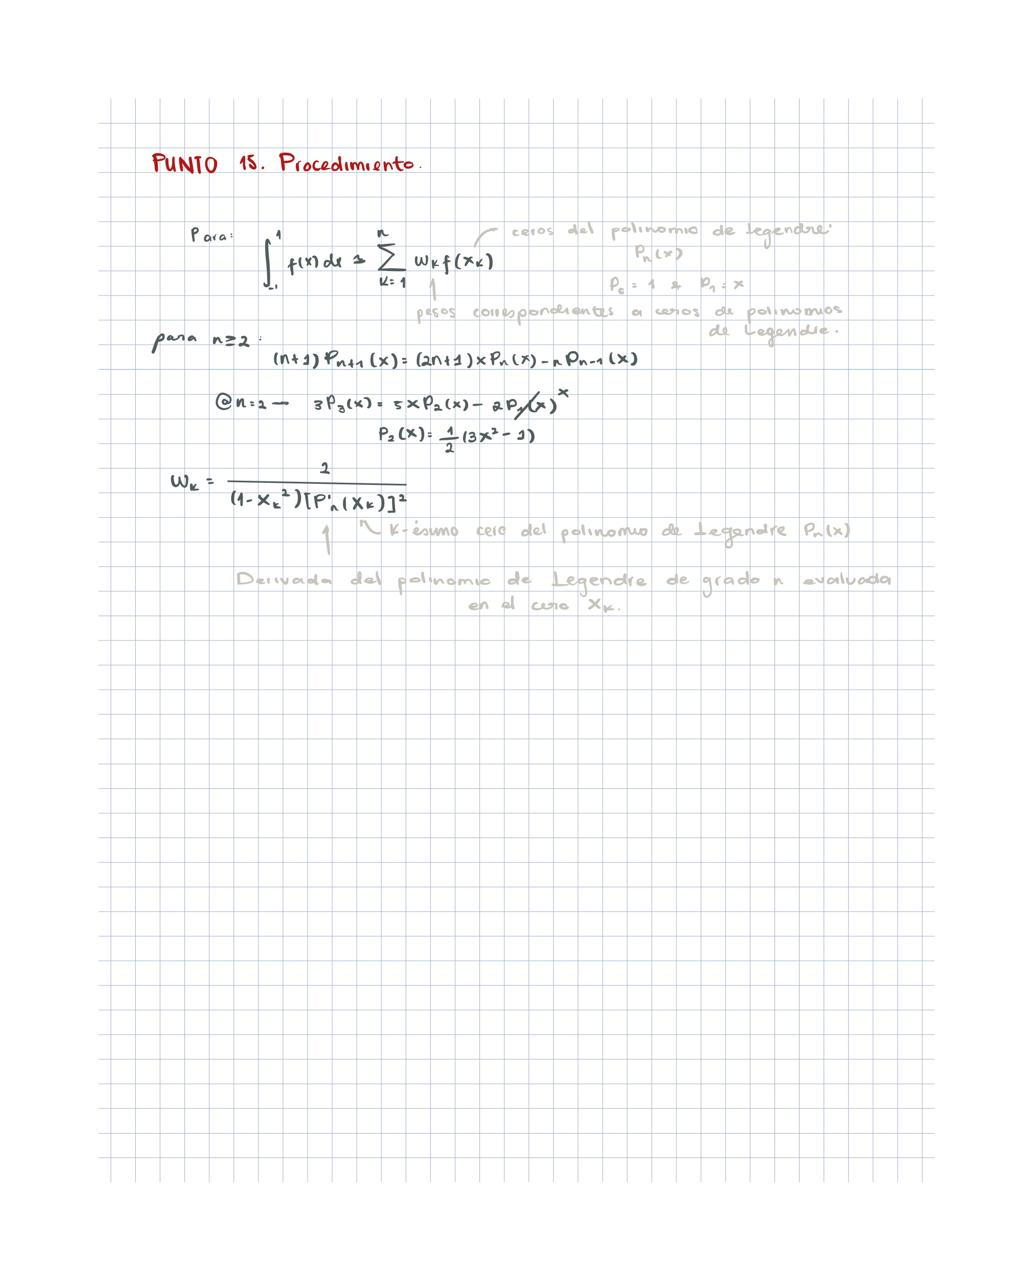

(b) Implemente la funcion sgn(x).

(c) Vectorice y dibuje la funcion.

(d) Defina los puntos y los pesos de Gauss-Legendre al grado n = 15.

(e) Cree y guarde los polinomios de Legendre al grado N = 20.

(f) Cree una funcion que calcule los N + 1 coeficientes en un array de numpy.

(g) Calcule la combinacion lineal (Ecuacion (4.193)) para cada valor del dominio que uso para dibujar la funcion original.

(h) Dibuje la representacion en la base de Legendre

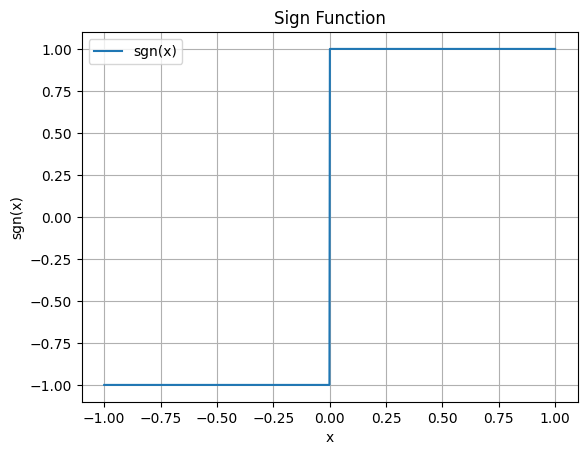

Punto Gauss-Legendre (roots): [ 9.87992518e-01  9.37273392e-01  8.48206583e-01  7.24417731e-01
  5.70972173e-01  3.94151347e-01  2.01194094e-01  4.04820401e-79
 -2.01194094e-01 -3.94151347e-01 -5.70972173e-01 -7.24417731e-01
 -8.48206583e-01 -9.37273392e-01 -9.87992518e-01]
Pesos Gauss-Legendre: [0.03075324 0.07036605 0.10715922 0.13957068 0.16626921 0.186161
 0.19843149 0.20257824 0.19843149 0.186161   0.16626921 0.13957068
 0.10715922 0.07036605 0.03075324]
Coeficientes Legendre: [ 1.01289121e-01  1.48971231e+00 -2.53222802e-01 -8.38742583e-01
  3.41850783e-01  6.15369232e-01 -4.11487054e-01 -4.68994560e-01
  4.70836148e-01  3.48540946e-01 -5.23459012e-01 -2.36219080e-01
  5.71235033e-01  1.22517145e-01 -6.15301735e-01  4.83216816e-16
  6.56410256e-01 -1.39529963e-01 -6.95087629e-01  3.07786739e-01
  7.31720625e-01]


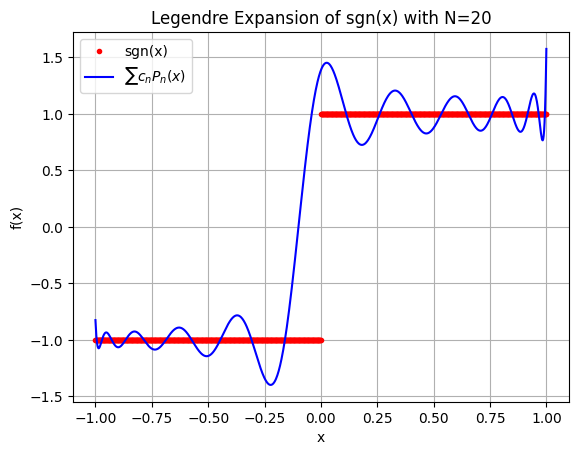

In [25]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

#b)

def sgn(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))

#c)

valores_x = np.linspace(-1, 1, 1000)
valores_y = sgn(valores_x)

plt.plot(valores_x, valores_y, label="sgn(x)")
plt.title("Sign Function")
plt.xlabel("x")
plt.ylabel("sgn(x)")
plt.grid(True)
plt.legend()
plt.show()


#d)

def newton_raphson_legendre(n, tol=1e-12, max_iter=100):

    x = np.cos(np.pi * (np.arange(1, n + 1) - 0.25) / (n + 0.5))
    P_n = sp.legendre(n)

    for _ in range(max_iter):
        P_n_vals = P_n(x)
        P_n_prime_vals = np.polyder(P_n)(x)
        dx = -P_n_vals / P_n_prime_vals
        x += dx
        if np.max(np.abs(dx)) < tol:
            break
    return x


def calcular_pesos(n, roots):
    P_n = sp.legendre(n)
    pesos = np.zeros(n)

    for i, root in enumerate(roots):
        P_n_prime_val = np.polyder(P_n)(root)
        pesos[i] = 2 / ((1 - root**2) * (P_n_prime_val)**2)

    return pesos

n = 15
puntos = newton_raphson_legendre(n)

pesos = calcular_pesos(n, puntos)


print("Punto Gauss-Legendre (roots):", puntos)
print("Pesos Gauss-Legendre:", pesos)


#e)

import scipy.special as sp

N = 20
P_legendre = [sp.legendre(i) for i in range(N+1)]

#f)
def legendre_coefficients(N, sgn_function, puntos, pesos):
    coefficients = np.zeros(N + 1)
    for n in range(N + 1):
        P_n = np.polynomial.Legendre.basis(n)
        integrand = sgn_function(puntos) * P_n(puntos)
        coefficients[n] = (2 * n + 1) / 2 * np.sum(integrand * pesos)
    return coefficients

coeffs = legendre_coefficients(N, sgn, puntos, pesos)
print("Coeficientes Legendre:", coeffs)


#g)
def legendre_approx(valores_x, coefficients, N):
    approx = np.zeros_like(valores_x)
    for n in range(N + 1):
        P_n = np.polynomial.Legendre.basis(n)
        approx += coefficients[n] * P_n(valores_x)
    return approx

valores_aprox = legendre_approx(valores_x, coeffs, N)

#h)
plt.plot(valores_x, valores_y, 'r.', label='sgn(x)')
plt.plot(valores_x, valores_aprox, 'b-', label=r'$\sum c_n P_n(x)$')
plt.title(f"Legendre Expansion of sgn(x) with N={N}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()